In [342]:
import pandas as np
import networkx as nx
import json


In [343]:
df = np.read_csv('data_scopus.csv')


In [344]:
nodes= df["EID"].values #diferetn
df = df.fillna(0)

In [345]:
df['Year'].max()
df['Year'].min()

1995

In [346]:
G = nx.Graph()

In [347]:
nodes = []
def extract_countries(affiliations):
    if isinstance(affiliations, str):
        return [aff.split(',')[-1].strip() for aff in affiliations.split(';') if ',' in aff]
    return []

# Apply the function to the DataFrame
df['Affiliation Countries'] = df['Authors with affiliations'].apply(extract_countries)
print(df[['Authors with affiliations', 'Affiliation Countries']])
for row in df.iterrows():
    nodes.append((row[1]["EID"], 
                 {"Title": row[1]["Title"], 
                  "Authors": row[1]["Authors"], 
                  "Year": row[1]["Year"],
                  "Citations": row[1]["Cited by"],
                  "Publisher": row[1]["Publisher"],
                  "Affiliation Countries": row[1]["Affiliation Countries"],
                  "Affiliation": [
                      affiliation.split(',', 2)[2].strip() if ',' in affiliation and len(affiliation.split(',', 2)) > 2 else affiliation
                      for affiliation in row[1]["Authors with affiliations"].split(';')
                  ] if isinstance(row[1]["Authors with affiliations"], str) else []
                 }))
   


                             Authors with affiliations  \
0    Zhang, Y., Department of Civil and Environment...   
1    Rapp, A., Computer Science Department, Univers...   
2    Isailović, D., Department for Construction Pro...   
3    Okada, K., Ochanomizu University, Tokyo, Japan...   
4    Abulaish, M., Department of Computer Science, ...   
..                                                 ...   
565  Prevost, Nathalie, Simon Fraser Univ, Burnaby,...   
566  Ueng, S.K., Univ of Utah, Salt Lake City, Unit...   
567  Shin, Byeong Seok, Seoul Natl Univ, Seoul, Sou...   
568  Ford, R., Univ of Montana, Missoula, United St...   
569  Hoskins, J.A., Univ of Manitoba, Winnipeg, Can...   

                                 Affiliation Countries  
0              [Canada, United States, Canada, Canada]  
1                                       [Italy, Italy]  
2    [Serbia, Germany, Germany, Germany, Serbia, Ge...  
3          [Japan, Japan, Japan, Australia, Australia]  
4                 

In [348]:
#nodes
G.add_nodes_from(nodes)

In [349]:
edges = []
for row in df.iterrows():
    current_paper = row[1]["EID"]
    if ";" in row[1]["Author(s) ID"][:-1]:
        authors = row[1]["Author(s) ID"][:-1].split(";")
        for author in authors:
            papers=df[df["Author(s) ID"].str.contains(author)]["EID"].values
            
        if len(papers)>0:

            for paper in papers:
                if paper != current_paper:
                    edges.append((current_paper,paper))
        
    else:
        continue


In [350]:
G.add_edges_from(edges)

In [351]:
pos = nx.drawing.circular_layout(G)

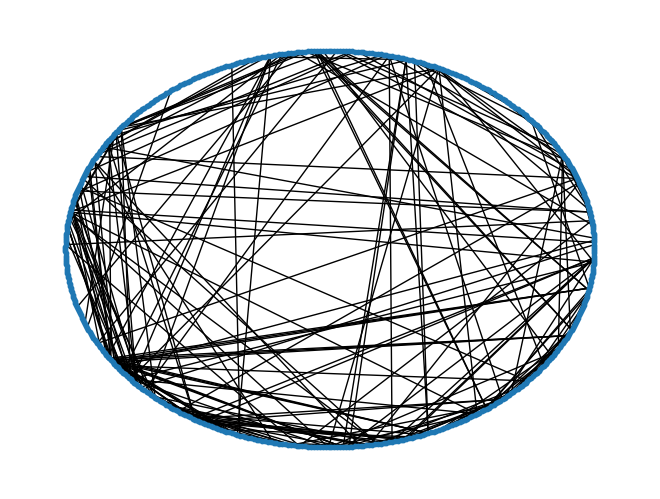

In [352]:
nx.draw(G, pos=pos, node_size=10)

In [353]:
from networkx.readwrite import json_graph


In [354]:
with open("publication_network.json", "w") as f:
    json.dump(json_graph.node_link_data(G),f)